In [1]:
import pickle
import pandas as pd

In [2]:
with open( "final_smart_review.pickle", "rb" ) as file:
    smart = pickle.load(file)

In [3]:
from konlpy.tag import Okt

In [4]:
okt = Okt()

In [49]:
# Î∂àÏö©Ïñ¥Í∞Ä Ï†ÄÏû•ÎêòÏñ¥ ÏûàÎäî ÌÖçÏä§Ìä∏ ÌååÏùº Î°úÎìú
file_path = 'stopword.txt'

# Î∂àÏö©Ïñ¥ ÌååÏùºÏùÑ ÏùΩÏñ¥ÏÑú set ÌòïÌÉúÎ°ú Ï†ÄÏû•
with open(file_path, 'r', encoding='utf-8') as f:
    stopwords = set([word.strip() for word in f.readlines()])

### Î≥ÑÏ†ê Í∏∞Ï§ÄÏúºÎ°ú Í∏çÏ†ïÎ¶¨Î∑∞ Î∂ÄÏ†ïÎ¶¨Î∑∞ Î∂ÑÎ¶¨

In [55]:
# Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ Ïã§ÏàòÎ°ú Î≥ÄÍ≤Ω
smart['Î≥ÑÏ†ê'] = smart['Î≥ÑÏ†ê'].astype('float32')

In [120]:
neg_df = smart[(smart['Î≥ÑÏ†ê'] <= 2.5)]
pos_df = smart[(smart['Î≥ÑÏ†ê'] >= 4)]

### Î∂àÏö©Ïñ¥ Ï≤òÎ¶¨ Ìï®Ïàò Ï†ïÏùò

In [114]:
def okt_pos_tagging(string):
    pos_words = okt.pos(string, stem=True, norm=True)
    words = [word for word, tag in pos_words if tag in ['Adjective','Noun'] if word not in stopwords]
    return words

### Í∏çÏ†ïÎ¶¨Î∑∞

In [126]:
# ÌòïÏö©ÏÇ¨Îßå Ï∂îÏ∂ú
def okt_pos_tagging(string):
    pos_words = okt.pos(string, stem=True, norm=True)
    words = [word for word, tag in pos_words if tag in ['Adjective'] if word not in stopwords]
    return words

In [127]:
cleaned_contents_list = []

for content in pos_df['ÎÇ¥Ïö©']:
    # Í≥µÎ∞± Î∞è Ï§ÑÎ∞îÍøà Ï†úÍ±∞
    cleaned_content = content.strip()  # ÏñëÏ™Ω Í≥µÎ∞± Ï†úÍ±∞
    
    # Ïó∞ÏÜçÎêú Í≥µÎ∞±ÏùÑ Îã®Ïùº Í≥µÎ∞±ÏúºÎ°ú Î≥ÄÌôò
    cleaned_content = ' '.join(cleaned_content.split())
    
    cleaned_contents_list.append(cleaned_content)

In [59]:
cleaned_contents_list

['ÎÑàÎ¨¥Ï¢ãÍ≥† Ìé∏ÌïòÍ≥† Ï°∞Î¶ΩÎèÑ Î≠ê ÎÇ´Î∞∞ÎìúÏûÖÎãàÎã§ ÎÑàÎ¨¥ÎÑàÎ¨¥Ï¢ãÏïÑÏöî Ï∂îÏ≤ú !!! Í≥†ÎØº ÎÖ∏',
 'Î∞îÎûåÏãúÏõêÌïòÍ≥† Ï¢ãÏäµÎãàÎã§ ÍπîÎÅîÌïòÍ∏∞ÎèÑÌïòÎÑ§Ïö©',
 'ÏßÑÏßú Ï°∞Ïö©ÌïòÍ≥† Î∞îÎûåÏù¥ ÏûêÍ∑πÏ†ÅÏù¥ÏßÄ ÏïäÏïÑ Ï¢ãÏïÑÏöî!!',
 'ÌôîÏù¥Ìä∏ÌÜ§Ïùò ÎîîÏûêÏù∏Ïù¥Îùº Îçî ÏòàÏÅòÍ≥† Î¨¥ÏÑ†Ïù¥Îùº Îçî Îçî Ï¢ãÏïÑÏöî. ÏÜåÎ¶¨ÎèÑ Ï†ïÎßê ÏïàÎÇòÏöî.',
 'Î∞∞ÏÜ°ÎèÑ Îπ†Î•¥Í≥† ÏÉùÍ∞ÅÎ≥¥Îã§ Îçî Ï¢ãÎÑ§Ïöî ÏãúÏõêÌïòÍ≥† Ï°∞Ïö©Ìï©ÎãàÎã§',
 'ÍπîÎÅîÌïòÍ≥† Ï°∞Î¶ΩÌïòÍ∏∞ ÏâΩÏäµÎãàÎã§ÎßåÏ°±Ìï©ÎãàÎã§',
 'ÎØ∏Î°ú Î¨¥ÏÑ† ÏÑ†ÌíçÍ∏∞ 3ÎÖÑ Ï†ÑÏóê Íµ¨ÏûÖÌïòÍ≥† ÎßàÏùåÏóê Îì§Ïñ¥ÏÑúÏú†ÏÑ† ÏÑ†ÌíçÍ∏∞ ÌïÑÏöîÎ°ú ÎØ∏Î°ú ÏÑ†ÌíçÍ∏∞ Ï§ëÏóêÏÑú ÏÑ†ÌÉùÌñàÏñ¥Ïöî. Ï†ÑÏóê Íµ¨ÏûÖÌïú Í≤ÉÎèÑ ÏóÑÏ≤≠ Ìé∏ÌïòÍ≥† ÎîîÏûêÏù∏ÎèÑ ÎßàÏùåÏóê Îì§ÏóàÎäîÎç∞ Ìå¨Ïù¥ ÏûëÏïÑÏÑú Ïù¥Î≤àÏóêÎäî 14Ïù∏Ïπò Ìå¨ÏúºÎ°ú ÌîΩ.!!Ìå¨ÏùÄ ÌÅ¨Í≥† Ï¢ãÏùÄÎç∞ ÏïΩÍ∞Ñ Ìà¨Î∞ïÌïú Í∞êÏù¥ ÏûàÎÑ§Ïöî.ÏÉâÎèÑ„ÖúÌôîÏù¥Ìä∏Í∞Ä ÏïÑÎãå ÏïÑÏù¥Î≥¥Î¶¨? ÎäêÎÇå ,, Îòê ÏïÑÏâΩ,,Í∏∞Îä•ÏùÄ Ï¢ãÏïÑÏöî. ÏÑúÌÅòÎ†àÏù¥ÌÑ∞Ïóê Ìå¨Ïù¥ Ïª§ÏÑú ÏãúÏõêÌïòÍ≥† Ï¢ãÎÑ§Ïöî. Í∑∏Îü∞Îç∞ 4Îã®Î∂ÄÌÑ∞ ÌãÄÏñ¥Ïïº ÏùºÎ∞ò 1Îã®Í≥

In [128]:
#Ï∂îÏ∂úÎêú Îã®Ïñ¥Îì§ÏùÑ Ï†ÄÏû•Ìï† Î¶¨Ïä§Ìä∏
extracted_words_list = []

# cleaned_contents_listÏóê ÏûàÎäî Í∞Å ÌÖçÏä§Ìä∏Ïóê ÎåÄÌï¥ okt_pos_tagging Ìï®Ïàò Ìò∏Ï∂úÌïòÏó¨ Ï∂îÏ∂úÎêú Îã®Ïñ¥Îì§ Î¶¨Ïä§Ìä∏Ïóê Ï†ÄÏû•
for text in cleaned_contents_list:
    extracted_words = okt_pos_tagging(text)
    extracted_words_list.append(extracted_words)

# Ï†ÄÏû•Îêú Ï∂îÏ∂úÎêú Îã®Ïñ¥Îì§ Î¶¨Ïä§Ìä∏ Ï∂úÎ†•
for idx, extracted_words in enumerate(extracted_words_list, start=1):
    print(f'Ï∂îÏ∂úÎêú Îã®Ïñ¥Îì§: {extracted_words}')
    print()

Ï∂îÏ∂úÎêú Îã®Ïñ¥Îì§: ['Ï¢ãÎã§', 'Ìé∏ÌïòÎã§', 'Ï¢ãÎã§']

Ï∂îÏ∂úÎêú Îã®Ïñ¥Îì§: ['ÏãúÏõêÌïòÎã§', 'Ï¢ãÎã§', 'ÍπîÎÅîÌïòÎã§']

Ï∂îÏ∂úÎêú Îã®Ïñ¥Îì§: ['Ï°∞Ïö©ÌïòÎã§', 'Ï¢ãÎã§']

Ï∂îÏ∂úÎêú Îã®Ïñ¥Îì§: ['ÏòàÏÅòÎã§', 'Ï¢ãÎã§']

Ï∂îÏ∂úÎêú Îã®Ïñ¥Îì§: ['Îπ†Î•¥Îã§', 'Ï¢ãÎã§', 'ÏãúÏõêÌïòÎã§', 'Ï°∞Ïö©ÌïòÎã§']

Ï∂îÏ∂úÎêú Îã®Ïñ¥Îì§: ['ÍπîÎÅîÌïòÎã§', 'ÎßåÏ°±ÌïòÎã§']

Ï∂îÏ∂úÎêú Îã®Ïñ¥Îì§: ['Ìé∏ÌïòÎã§', 'ÏûëÎã§', 'Ï¢ãÎã§', 'Î∞ïÌïòÎã§', 'ÏïÑÎãàÎã§', 'ÏïÑÏâΩÎã§', 'Ï¢ãÎã§', 'ÏãúÏõêÌïòÎã§', 'Ï¢ãÎã§', 'ÏïÑÎãàÎã§']

Ï∂îÏ∂úÎêú Îã®Ïñ¥Îì§: ['ÎßåÏ°±Ïä§ÎüΩÎã§']

Ï∂îÏ∂úÎêú Îã®Ïñ¥Îì§: ['ÎßåÏ°±Ïä§ÎüΩÎã§', 'ÎπÑÏã∏Îã§', 'Ìé∏Î¶¨ÌïòÎã§', 'Î≤àÍ±∞Î°≠Îã§', 'ÏóÜÎã§', 'Ï¢ãÎã§', 'Î∂àÌé∏ÌïòÎã§', 'ÏïÑÎãàÎã§', 'ÏóÜÎã§', 'ÏïÑÏâΩÎã§']

Ï∂îÏ∂úÎêú Îã®Ïñ¥Îì§: ['Ìé∏ÌïòÎã§', 'ÏãúÎÅÑÎüΩÎã§', 'ÎßéÎã§', 'ÏïÑÎãàÎã§']

Ï∂îÏ∂úÎêú Îã®Ïñ¥Îì§: ['Í∞ÄÎä•ÌïòÎã§', 'ÏûëÎã§', 'Ïã´Îã§', 'Ï¢ãÎã§']

Ï∂îÏ∂úÎêú Îã®Ïñ¥Îì§: ['ÌûòÎì§Îã§', 'Ìé∏Î¶¨ÌïòÎã§']

Ï∂îÏ∂úÎêú Îã®Ïñ¥Îì§: ['Ï¢ãÎã§', 'Ìé∏ÌïòÎã§', 'Î∂àÌé∏ÌïòÎã§', 'Ìé∏ÌïòÎã§']

Ï∂îÏ∂úÎêú Îã®Ïñ¥Îì§: ['Í∑ÄÏ∞ÆÎã§', 

In [10]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

In [129]:
count_list = []

for words in extracted_words_list:
    count = Counter(words)
    count.most_common(100)
    count_list.append(count)

In [12]:
count_list

[Counter({'Ï¢ãÎã§': 2, 'Ìé∏ÌïòÎã§': 1}),
 Counter({'ÏãúÏõêÌïòÎã§': 1, 'Ï¢ãÎã§': 1, 'ÍπîÎÅîÌïòÎã§': 1}),
 Counter({'Ï°∞Ïö©ÌïòÎã§': 1, 'Ï¢ãÎã§': 1}),
 Counter({'ÏòàÏÅòÎã§': 1, 'Ï¢ãÎã§': 1}),
 Counter({'Îπ†Î•¥Îã§': 1, 'Ï¢ãÎã§': 1, 'ÏãúÏõêÌïòÎã§': 1, 'Ï°∞Ïö©ÌïòÎã§': 1}),
 Counter({'ÍπîÎÅîÌïòÎã§': 1, 'ÎßåÏ°±ÌïòÎã§': 1}),
 Counter({'Ï¢ãÎã§': 3, 'Ìé∏ÌïòÎã§': 1, 'ÏûëÎã§': 1, 'Î∞ïÌïòÎã§': 1, 'ÏïÑÏâΩÎã§': 1, 'ÏãúÏõêÌïòÎã§': 1}),
 Counter({'ÎßåÏ°±Ïä§ÎüΩÎã§': 1}),
 Counter({'ÎßåÏ°±Ïä§ÎüΩÎã§': 1,
          'ÎπÑÏã∏Îã§': 1,
          'Ìé∏Î¶¨ÌïòÎã§': 1,
          'Î≤àÍ±∞Î°≠Îã§': 1,
          'Ï¢ãÎã§': 1,
          'Î∂àÌé∏ÌïòÎã§': 1,
          'ÏïÑÏâΩÎã§': 1}),
 Counter({'Ïù¥Î†áÎã§': 1, 'Ìé∏ÌïòÎã§': 1, 'ÏãúÎÅÑÎüΩÎã§': 1, 'ÎßéÎã§': 1}),
 Counter({'Í∞ÄÎä•ÌïòÎã§': 1, 'ÏûëÎã§': 1, 'Ïã´Îã§': 1, 'Ï¢ãÎã§': 1}),
 Counter({'ÌûòÎì§Îã§': 1, 'Ìé∏Î¶¨ÌïòÎã§': 1}),
 Counter({'Ìé∏ÌïòÎã§': 2, 'Ï¢ãÎã§': 1, 'Î∂àÌé∏ÌïòÎã§': 1}),
 Counter({'Í∑ÄÏ∞ÆÎã§': 1, 'Ìé∏ÌïòÎã§': 1, 'ÏõêÌïòÎã§': 1, 'Ï¢ãÎã§': 1}),
 Counter({'ÏïàÎêòÎã§'

In [130]:
# Î™®Îì† Conter Í∞ùÏ≤¥Î•º Ìï©ÏπòÍ∏∞
total_counter = Counter()
for counter in count_list:
    total_counter += counter

In [64]:
total_counter

Counter({'Ï¢ãÎã§': 1688,
         'Ìé∏ÌïòÎã§': 400,
         'ÍπîÎÅîÌïòÎã§': 353,
         'ÏòàÏÅòÎã§': 264,
         'Ïù¥ÏÅòÎã§': 199,
         'ÏóÜÎã§': 192,
         'Í∞ÄÎä•ÌïòÎã§': 184,
         'ÎßåÏ°±ÌïòÎã§': 167,
         'Ï†ïÌôïÌïòÎã§': 164,
         'Îπ†Î•¥Îã§': 163,
         'Ìé∏Î¶¨ÌïòÎã§': 127,
         'Ï†ÄÎ†¥ÌïòÎã§': 108,
         'Í∞ÄÎ≥çÎã§': 95,
         'Ïó∞Í≤∞ÌïòÎã§': 79,
         'ÏïÑÎãàÎã§': 76,
         'Í¥úÏ∞ÆÎã§': 71,
         'ÏïàÎêòÎã§': 63,
         'Îã§ÏñëÌïòÎã§': 61,
         'ÏûëÎã§': 58,
         'ÎßéÎã§': 54,
         'Í∑ÄÏ∞ÆÎã§': 53,
         'Í∑ÄÏóΩÎã§': 52,
         'ÌïÑÏöîÌïòÎã§': 52,
         'Í∞ÑÌé∏ÌïòÎã§': 50,
         'ÎßåÏ°±Ïä§ÎüΩÎã§': 49,
         'ÌäºÌäºÌïòÎã§': 43,
         'Ïú†Ïö©ÌïòÎã§': 43,
         'Î∂àÌé∏ÌïòÎã§': 42,
         'Í∑∏Î†áÎã§': 39,
         'ÏõêÌïòÎã§': 37,
         'Ïã†Í∏∞ÌïòÎã§': 37,
         'ÏïÑÏâΩÎã§': 35,
         'Í∞ÑÎã®ÌïòÎã§': 35,
         'Îπ®Î•¥Îã§': 32,
         'ÏÉàÎ°≠Îã§': 31,
         'Ï†ÅÎãπÌïòÎã§': 30,
         

<function matplotlib.pyplot.show(close=None, block=None)>

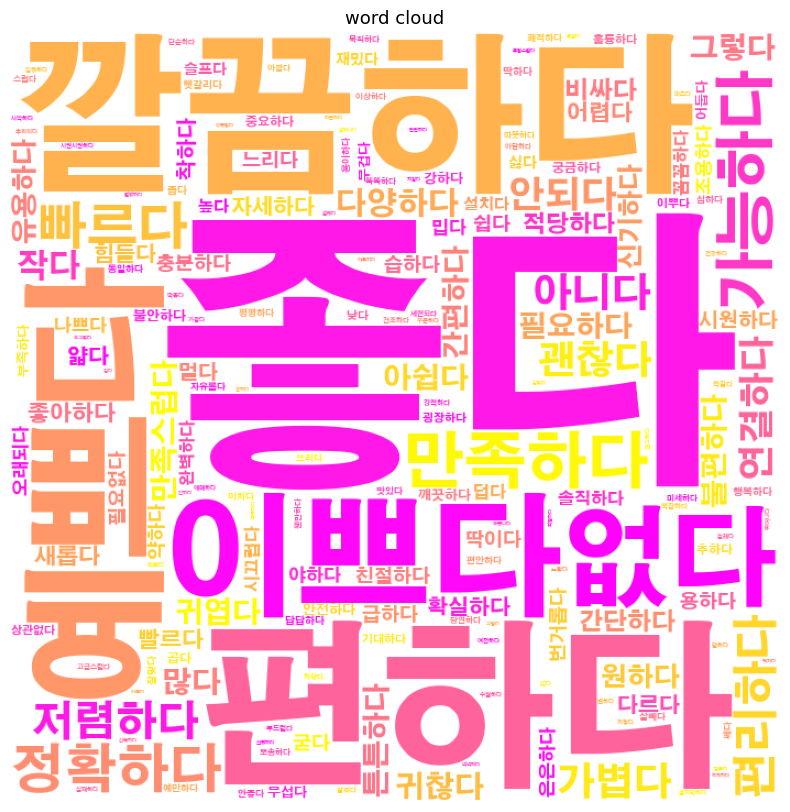

In [131]:
from wordcloud import WordCloud

wordcloud = WordCloud(font_path='C:\Windows\Fonts\H2GTRE.TTF',
                     width = 700,
                     height = 700,
                     background_color = 'white',
                     colormap = 'spring',
                     random_state = 1).generate_from_frequencies(total_counter)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('word cloud', size=13)
plt.show

### Î∂ÄÏ†ïÎ¶¨Î∑∞ 

In [119]:
neg_df

ÏûëÏÑ±Ïûê        ÏûëÏÑ±ÎÇ†Ïßú   Î≥ÑÏ†ê  \
21           ÌïòÎãà614  2024.07.03  2.5   
90           Ïñ¥ÎîîÎì†Í≥∂Í∞ê  2024.02.15  2.3   
140            ÎçòÎç©Íµ¨  2024.03.28  2.5   
147             ÏàòÎ®ï  2022.08.22  2.0   
149         221124  2023.04.12  1.0   
152     robbieshaw  2021.11.09  2.5   
180    jwhsgsuhdjw  2023.10.24  1.0   
197        anny333  2023.01.22  2.5   
230           ÎßàÏù¥Ï£ºÎ¨∏  2024.02.07  2.0   
445         soom26  2024.02.08  2.5   
470          ÎèÑÎèÑ349  2021.09.04  2.0   
486     lr10****62  2023.05.04  2.5   
488         SPNV74  2021.09.14  1.0   
775          ÌîºÏóêÏä§ÏôÄ2  2024.02.14  1.0   
1343         ÎùºÏóêÎã§ÏóÑÎßà  2020.03.11  2.5   
1344           Ïä§Î≤ÖÎπ†  2019.12.12  2.3   
1345          ÏÑ±Ïö∞90  2020.05.04  1.0   
1758          Ï±ÑÏ§ÄÏõê3  2022.02.15  2.5   
1880         Ï±ÑÏõÄ366  2022.03.16  1.0   
1905         ÎØ∏ÎãàÏñ∏Ï¶àv  2021.09.19  1.0   
1906      KIM_DDYO  2022.01.22  1.5   
1948   Î∞ïÏÜåÌòÑ(sophie)  2022.07.20  2.5   
2345        Î∞ïÎã§Ïõê777  2024.05.19  2.5   
2597          ÌÇ§ÎØ∏ÌÉúÎã§  2022.08.19  2.0   
2603       lunara_  2024.03.05  1.0   
2634           ÏõêÏú†Íµ∞  2023.12.06  1.0   
2640           ÏñåÎÉ†‚ô°  2023.12.01  2.3   
2717        mm3492  2024.02.17  2.0   
2855          000Ï£º  2023.07.18  1.0   
3448         snoh3  2022.08.31  1.0   
3473            ÎßàÎ±Å  2022.10.01  2.5   
3476         Í≤ΩÎ™®ÏïÑÏù¥Îîî  2022.08.20  2.0   
3486         ÏßÄÎáΩÏä§Îü¨ÏõÄ  2022.11.09  2.5   
3793  hyojiniiiiii  2024.01.05  1.0   

                                                     ÎÇ¥Ïö©  
21    Ïï± Ïó∞ÎèôÏù¥ ÎêòÎãàÍπå ÎÑàÎ¨¥ Ìé∏ Ìïò Í≥† Ï¢ãÎçîÎùºÍ≥†Ïöî Í∑ºÎç∞ Ïï±Îì§Ïñ¥Í∞ÄÏÑú Î≤ÑÌäºÏùÑ ÌÑ∞ÏπòÌïòÍ∏∞ÍπåÏßÄ Î†â...  
90    Ïä§ÏúÑÏπòÍ∞Ä ÎÉâÏû•Í≥† ÏòÜÏ™ΩÏóê ÏûàÏñ¥ Ïä§ÎßàÌä∏ Ïä§ÏúÑÏπòÎ•º Íµ¨Îß§ÌñàÏßÄÎßå ÎÉâÏû•Í≥†Ïóê Í∞ÄÎ†§ÏßÑÍ±∞ ÎïåÎ¨∏Ïù∏ÏßÄ ...  
140                            Î¶¨Î™®ÏΩòÏùÑ Í∞ôÏù¥ ÏÖãÌä∏Î°ú ÌïòÎ©¥ Ï¢ãÏïòÏùÑ ÎìØ Ìï©ÎãàÎã§  
147   Í≥ÑÏÜç ÏïàÎ∂ôÍ≥† Îñ®Ïñ¥Ï†∏ÏÑú ÎÅàÎÅàÏù¥Î•º ÏÉÄÏßÄÎßå Î≠êÍ∞Ä Î¨∏Ï†úÏù∏ÏßÄ Î∂ôÏù¥Î©¥ Î∂àÏù¥ ÏºúÏßÄÏßàÏïäÏùå Í±ç ÎÇú ...  
149   Î≠ò Ïñ¥ÎñªÍ≤å ÎßåÎì†Í±¥ÏßÄ Î∏åÎùºÏ∫£ Îã§Îñ®Ïñ¥ÏßÄÍ≥† ÎÇúÎ¶¨ÎÇ©ÎãàÎã§ ÎèàÏ£ºÍ≥† Ïì∞Î†àÍ∏∞Î•º ÏÉÄÏñ¥Ïöî ÏÇ¨ÏßÄÎßàÏÑ∏Ïöî ...  
152   ÏÉùÍ∞ÅÎ≥¥Îã§ ÏÜåÎ¶¨Í∞Ä ÎÑàÎ¨¥ Ïª§ÏÑú ÏïàÏ¢ãÏïÑÏöî, ÎÇ¥Íµ¨ÏÑ±ÎèÑ ÏïΩÌï¥ÏÑú Î™áÎã¨Ïù¥Î©¥ Í≥†Ïû• ÎÇ†ÎìØÌï¥Ïöî. 5Îßå...  
180   ÏßÑÏßú Î≥ÑÎ°úÏòàÏöî Ïù¥Í≤å ÏôÄÏù¥ÌååÏù¥Î°ú Ïó∞Í≤∞Ìï¥ÏÑú Ïì∞ÎäîÍ±¥Îç∞ ÌóàÍµ¨Ïñ∏ÎÇ† Î¨¥ÌïúÎ°úÎî©Ïóê Ïó∞Í≤∞Ïù¥ ÏïàÎê† Îïå...  
197   Ìï∏ÎìúÌè∞ Ïó∞ÎèôÌï¥ÏÑú Ïì∞ÎäîÍ±¥Îç∞.......ÏïÑÏπ®Ïóê Ïì∞Í≥† Ï†ÄÎÖÅÏóê Ïì∞Î†§Î©¥ ÏÑúÎπÑÏä§Ïó∞Í≤∞Ïù¥ ÏïàÎê©ÎãµÎãà...  
230   Í∞ÑÌé∏ÌïòÍ≥† ÏÑ§Ï†ïÏâ¨ÏõåÏÑú Ï¢ãÏùÄÎç∞ Ïì∞Îã§Î≥¥ÎãàÍπå Î∞îÎã•Ïóê ÌÉÅÌÉÅÏ≥êÏßëÎãàÎã§ Í≥†Ïû•ÎÇòÍ≤†Ïñ¥Ïöî ÌïúÏ™ΩÎ∞ú Îõ∏ÎïåÎßà...  
445   1ÎÖÑ Ï†ÑÏóê Íµ¨Îß§ÌïòÍ≥† Í¥úÏ∞ÆÏïòÏñ¥ÏÑú ÏπúÏ†ïÏóê ÎëêÎ†§Í≥† Ïù¥Î≤àÏóê ÌïòÎÇòÎ•º Îçî Íµ¨Îß§ÌñàÎäîÎç∞, Îëê Í∏∞Í∏∞...  
470   Ïù¥ Ï†úÌíàÏùÄ Ï†úÌíàÎ≥¥Îã§ÎèÑ Ïñ¥ÌîåÏù¥ Ï†ïÎßê Î≥ÑÎ°úÏòàÏöî. Ï†úÌíàÎèÑ Ï≤òÏùå Î∞õÏïÑÏÑú ÏÑ§ÏπòÌï¥Î≥¥Í≥† ÏÉùÍ∞ÅÎ≥¥Îã§...  
486   ÏùºÎã® Î∞∞ÏÜ° ÌèâÍ∑† 2~3Ïùº ÏïûÎ©¥ ÌïÑÎ¶ÑÏûàÎäîÏ§ÑÏïî..ÏóÜÏùå Í∏∞Ïä§ ÎåÄÎ∞ï Í±çÏì∏ÏÇ¨ÎûåÎßå^^ ÏñëÎ©¥ ÌÖå...  
488   Ïñ¥ÌîåÎ°ú ÎÅÑÍ≥† ÏºúÏïºÌïòÎäîÎç∞ Ïñ¥ÌîåÏù¥ Ìà≠ÌïòÎ©¥ Î®πÌÜµÏù¥Í≥† ÏòàÏïΩÌï¥ÎÜîÎèÑ Ïñ¥ÌîåÏù¥ Î®πÌÜµÏù¥Îùº Ïïà ÏºúÏßÄÍ∏∞...  
775   Íµ¨ÏûÖÌïúÏßÄ Ïú°Í∞úÏõî ÎßåÏóê Í±¥Ï†ÑÏßÄÍ∞Ä Îπ®Î¶¨ Îã≥Í∏∞ ÏãúÏûëÌïòÎçîÎãà ÏùºÎÖÑÎèÑ ÎêòÍ∏∞Ï†ÑÏóê ÏÉà Í±¥Ï†ÑÏßÄ ÍµêÏ≤¥...  
1343  ÏÑ§Ï†ïÏïàÌïòÍ≥† Í∑∏ÎÉ• Î¨¥Í≤åÎßå Ïû¨Í≥† Ïã∂ÏùÄÎç∞ ÏûêÍæ∏ P0Ïù¥ Îú®Î©¥ÏÑú ÏÑ§Ï†ïÌï¥ÏïºÎßå Î¨¥Í≤åÎ•º Ïû¥ÏàòÏûáÏùå....  
1344           Ìé∏ÌèâÌïúÍ≥≥Ïóê ÎëêÏñ¥ÎèÑ ÏßÄ ÎßòÎåÄÎ°ú Î™∏Î¨¥Í≤å Ï∏°Ï†ï ÌïòÎÑ§Ïöî. Í∑∏ÎÉ• ÌôòÎ∂à Î∂ÄÌÉÅÎìúÎ¶ΩÎãàÎã§  
1345                              ÏóÜÏñ¥Ïöî.no good .......„Ö†„Ö†  
1758  Ïò§Ïä§Îûå Ï†ÄÍ∞ÄÏ†úÌíàÏóê ÎπÑÌï¥ ÏÜåÏùåÎèÑ ÏóÜÍ≥† Î¶¨Î™®Ïª®ÎèÑ Î∏îÎ£®Ìà¨Ïä§Î∞©ÏãùÏù¥Îùº Ìé∏Î¶¨ÌïòÍ≥† Ï¢ãÏúºÎÇò ÌîÑÎ°úÎùº...  
1880  Îì±Î°ùÏù¥ Îß§Ïö∞Ïñ¥Î†µÏäµÎãàÎã§.Îì±Î°ùÍ≥ºÏ†ïÏù¥ Ïñ¥Î†§Ïö¥Í≤å ÏïÑÎãàÎùº Í∏∞Í∏∞ÏûêÏ≤¥Í∞Ä Ïù∏ÏãùÏú®Ïù¥ Îß§Ïö∞ Ï†ÄÏ°∞Ìï©ÎãàÎã§...  
1905  Ï†ïÎßê Î≥ÑÎ°úÎÑ§ÏöîÏ≤òÏùåÏóî Ï¢ãÏùÄÏ§Ñ ÏïåÍ≥† Ïì∞Îã§Í∞ÄÏñ¥Ìîå ÏÑúÎ≤ÑÍ∞Ä ÎÑàÎ¨¥ Î∂àÏïàÏ†ïÌïòÍ≥†Ïñ¥Ìîå ÏûêÏ

In [90]:
cleaned_contents_list = []

for content in neg_df['ÎÇ¥Ïö©']:
    # Í≥µÎ∞± Î∞è Ï§ÑÎ∞îÍøà Ï†úÍ±∞
    cleaned_content = content.strip()  # ÏñëÏ™Ω Í≥µÎ∞± Ï†úÍ±∞
    
    # Ïó∞ÏÜçÎêú Í≥µÎ∞±ÏùÑ Îã®Ïùº Í≥µÎ∞±ÏúºÎ°ú Î≥ÄÌôò
    cleaned_content = ' '.join(cleaned_content.split())
    
    cleaned_contents_list.append(cleaned_content)

In [115]:
#Ï∂îÏ∂úÎêú Îã®Ïñ¥Îì§ÏùÑ Ï†ÄÏû•Ìï† Î¶¨Ïä§Ìä∏
extracted_words_list = []

# cleaned_contents_listÏóê ÏûàÎäî Í∞Å ÌÖçÏä§Ìä∏Ïóê ÎåÄÌï¥ okt_pos_tagging Ìï®Ïàò Ìò∏Ï∂úÌïòÏó¨ Ï∂îÏ∂úÎêú Îã®Ïñ¥Îì§ Î¶¨Ïä§Ìä∏Ïóê Ï†ÄÏû•
for text in cleaned_contents_list:
    extracted_words = okt_pos_tagging(text)
    extracted_words_list.append(extracted_words)

# Ï†ÄÏû•Îêú Ï∂îÏ∂úÎêú Îã®Ïñ¥Îì§ Î¶¨Ïä§Ìä∏ Ï∂úÎ†•
for idx, extracted_words in enumerate(extracted_words_list, start=1):
    print(f'Ï∂îÏ∂úÎêú Îã®Ïñ¥Îì§: {extracted_words}')
    print()

Ï∂îÏ∂úÎêú Îã®Ïñ¥Îì§: ['Ïï±', 'Ïó∞Îèô', 'Ìé∏', 'Í≥†', 'Ï¢ãÎã§', 'Ïï±', 'Î≤ÑÌäº', 'ÌÑ∞Ïπò', 'Î†â', 'Í≤ΩÏö∞', 'Î∂àÌé∏ÌïòÎã§', 'ÌÉÄÏù¥Î®∏', 'ÏÑ§Ï†ï', 'Ï†ê', 'Ìé∏ÌïòÎã§', 'Í±∞', 'ÏÇ¨Ïö©', 'ÌõÑ', 'ÏßÑÏßú', 'ÏÇ∂', 'Ïßà', 'ÏàòÏßÅ', 'ÏÉÅÏäπ']

Ï∂îÏ∂úÎêú Îã®Ïñ¥Îì§: ['Ïä§ÏúÑÏπò', 'ÎÉâÏû•Í≥†', 'ÏòÜÏ™Ω', 'Ïä§ÎßàÌä∏', 'Ïä§ÏúÑÏπò', 'Íµ¨Îß§', 'ÎÉâÏû•Í≥†', 'ÎïåÎ¨∏', 'ÎØ∏ÌÑ∞', 'Í±∞Î¶¨', 'Î¶¨Î™®Ïª®', 'ÏûëÎèô', 'ÏïàÌï®']

Ï∂îÏ∂úÎêú Îã®Ïñ¥Îì§: ['Î¶¨Î™®ÏΩò', 'ÏÖãÌä∏', 'Ï¢ãÎã§', 'ÎìØ']

Ï∂îÏ∂úÎêú Îã®Ïñ¥Îì§: ['Í≥ÑÏÜç', 'ÎÅàÎÅàÏù¥', 'Î≠ê', 'Î¨∏Ï†ú', 'Î∂ôÏù¥', 'Î∂à', 'ÎÇú', 'ÎπÑÏã∏Îã§', 'Ïì∞Î†àÍ∏∞', 'Í∞úÎ≥Ñ', 'ÎßàÏºì']

Ï∂îÏ∂úÎêú Îã®Ïñ¥Îì§: ['Î≠ò', 'Î∏åÎùº', 'Ï∫£', 'ÎÇúÎ¶¨', 'Îèà', 'Ïì∞Î†àÍ∏∞', 'ÏÇ¨ÏßÄ', 'Í≥ÑÏÜç', 'Ïò®', 'ÏßëÏïà', 'Î∂ÄÏàò']

Ï∂îÏ∂úÎêú Îã®Ïñ¥Îì§: ['ÏÉùÍ∞Å', 'ÏÜåÎ¶¨', 'Ïª§ÏÑú', 'ÏïàÏ¢ãÎã§', 'Íµ¨ÏÑ±', 'ÏïΩÌïòÎã§', 'Îã¨Ïù¥', 'Í≥†Ïû•', 'Ìï¥', 'ÏÇ¨Ïö©', 'Î™®ÌÑ∞', 'ÏïàÏ¢ãÎã§', 'Í±∞', 'Íº≠', 'ÏÑúÎ≥¥Î™®ÌÑ∞', 'ÏÜåÎ¶¨', 'Í∏∞Ïñ¥', 'ÌîåÎùºÏä§Ìã±', 'Î©îÌÉà', 'ÏÇ¨Ïö©', 'ÏßÄÏ†ÄÎ∂ÑÌïòÎã§', 'ÏÜåÎ¶¨', 'ÏïàÎÇò', '

In [116]:
count_list = []

for words in extracted_words_list:
    count = Counter(words)
    count.most_common(100)
    count_list.append(count)

In [117]:
# Î™®Îì† Conter Í∞ùÏ≤¥Î•º Ìï©ÏπòÍ∏∞
total_counter = Counter()
for counter in count_list:
    total_counter += counter

<function matplotlib.pyplot.show(close=None, block=None)>

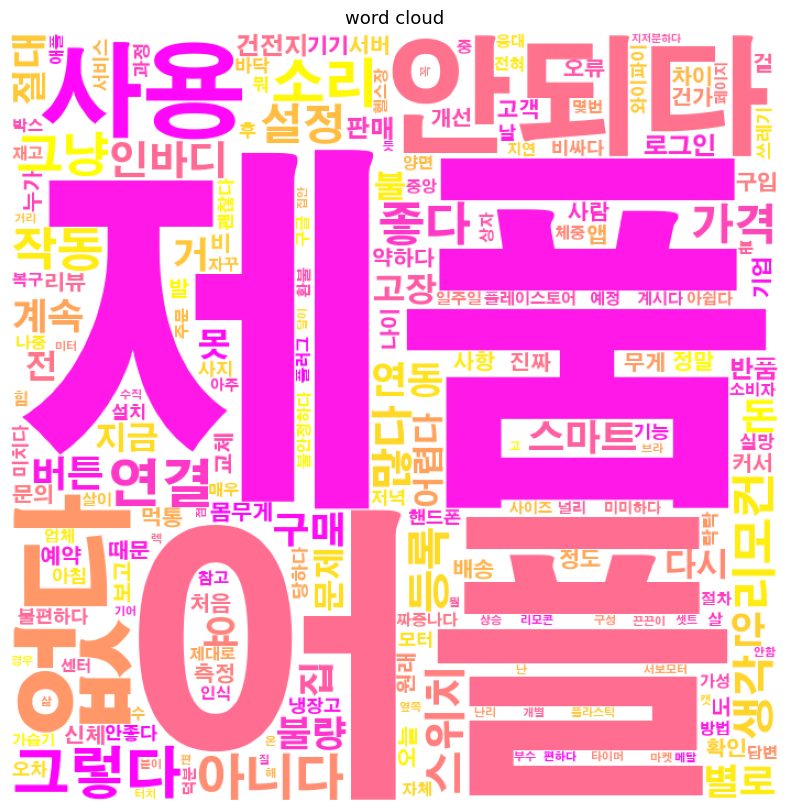

In [118]:
from wordcloud import WordCloud

wordcloud = WordCloud(font_path='C:\Windows\Fonts\H2GTRE.TTF',
                     width = 700,
                     height = 700,
                     background_color = 'white',
                     colormap = 'spring',
                     random_state = 1).generate_from_frequencies(total_counter)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('word cloud', size=13)
plt.show